$\min_{x \in R^n}x^TAx - b^Tx$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.pyplot as plt

In [51]:
## Define Cost function
def f(x, A, b):
  return np.dot(x, A@x) - np.dot(b, x)

In [52]:
## Define gradient 
def gradf(x, A, b):
  return 2 * A@x - b

In [55]:
## Define steepest descent method

def steepest_gradient_descent(x,A,b,alpha=0.001,epsilon=1e-4):
  prev_x = x
  converged = False
  iters = 0
  fig = plt.figure()
  ax = fig.add_subplot()
  trace = []
  trace.append(x)
  while not converged:
    #print("Iteration: ", iters, "x: ", x, "f(x):", f(x),"next step size: ",alpha)
    d = -gradf(x,A,b)
    prev_x = x 
    x = x + alpha*d
    iters += 1
    converged = np.linalg.norm(prev_x-x) < epsilon
    trace.append(x)
  plot_state(x, A, b, trace, ax, fig)
  return (x, iters)

In [54]:
def plot_state(x, A, b, trace, ax, fig):
    
    curr_x1, curr_x2 = x[0], x[1]
    ax.clear()

    # Make data.
    X_range = np.arange(-100, 100, 0.1)
    Y_range = np.arange(-100, 100, 0.1)
    X, Y= np.meshgrid(X_range, Y_range)
    Z = np.array([f(np.array([X[i,j],Y[i,j]]),A,b) for i in range(len(X_range)) for j in range(len(Y_range))]).reshape(len(X), len(Y))


    trace_x, trace_y = [x[0] for x in trace], [x[1] for x in trace]

    # Plot the surface.
    '''surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                        linewidth=0, antialiased=False, zorder=0)'''
    plt.contour(X, Y, Z)
    #plt.scatter(trace_x, trace_y, color = 'm')
    for i in range(1, len(trace_x)):
        plt.arrow(trace_x[i], trace_y[i], trace_x[i] - trace_x[i-1], trace_y[i] - trace_y[i-1], head_width = 0.02, color='r')
    plt.colorbar()
    display(fig)
    clear_output(wait = True)
    #plt.pause(1)

With $\alpha = 0.001$

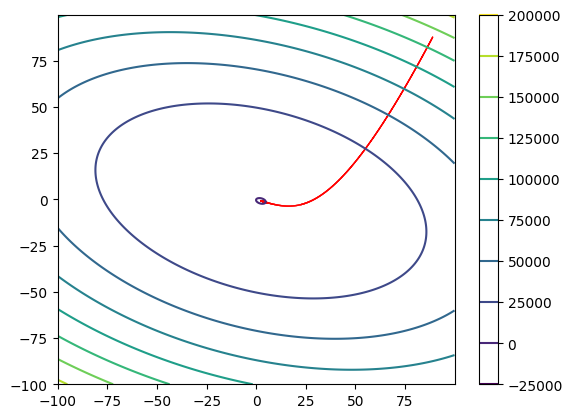

In [56]:
x = np.array([90, 90])
A = np.array([[4, 2],[2, 10]])
b = np.array([15.5, -7.4])

x_opt_sg, iters = steepest_gradient_descent(x,A,b)

In [57]:
print('Converged in {} steps'.format(iters))
print(x_opt_sg)

Converged in 1216 steps
[ 2.37225186 -0.84588086]


With $\alpha = 0.01$

Converged in 152 steps
[ 2.35959264 -0.84204795]


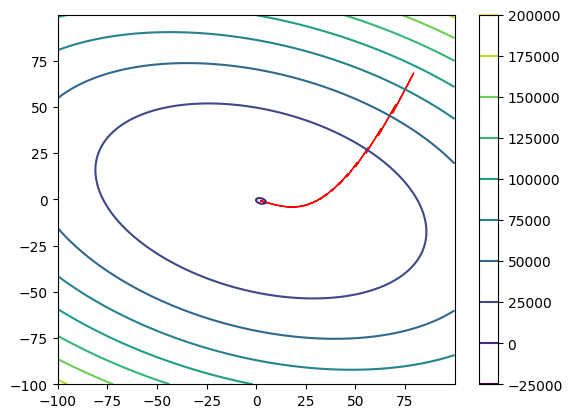

In [60]:
x = np.array([90, 90])
A = np.array([[4, 2],[2, 10]])
b = np.array([15.5, -7.4])
alpha = 0.01
x_opt_sg, iters = steepest_gradient_descent(x,A,b,alpha)
print('Converged in {} steps'.format(iters))
print(x_opt_sg)